In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
PATH = "2017/Student Feedback Surveys-Superview.csv" 

df = pd.read_csv(PATH)

df.head(10)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right
6,28,Los Angeles,Apps,Week 7,5,Just right
7,65,San Francisco,Apps,Week 1,5,A little too slow
8,101,Santa Clara,Apps,Week 1,5,A little too slow
9,124,Santa Clara,Apps,Week 1,5,Just right


## Data sanitisation for "Rating (Num)"

In [60]:
# Type of input rating?
df_test = df["Rating (Num)"][0]
print(type(df_test))


<class 'str'>


In [61]:
# bad data discovered!
ls_bad_data = df["Rating (Num)"].unique()

ls_bad_data

array(['3', '4', '5', '6', '7', '8', '9', '10', '0', '1', '2', '#ERROR!'],
      dtype=object)

In [62]:
# Fina all non bad data from "Rating (Nums)" column
ARG_NOT_BAD_ENTRY = (df["Rating (Num)"] != "#ERROR!")

# Update dataframe to remove all bad entries in "Rating (Nums)" column
df = df[ARG_NOT_BAD_ENTRY]

# Remove NaN values
# df.dropna()

In [185]:
# overrite existing column (cast all Ratings to ints)
df["Rating (Num)"] = df["Rating (Num)"].astype(int)

for i in df["Rating (Num)"][:5]:
    print(type(i))
 

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


In [64]:
df.head(5)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


- **Map**: Iterates over data and returns same-size data with function applied to each element.
    - EX: Map over data to multiply each entry in data by 5. 
- **Filter**: Iterates over data and returns subset of data with some filtering function applied to each element.
    - EX: Filter over data to return data within range (0, 10).
- **Reduce**: Iterates over data and returns single object with some accumulative reducing function applied to each element.
    - EX: Reduce all data to sum all entries in dataset.

In [65]:
# change all elements of series/df column based on some arg --> BAD
# iterably filter elements based on logical expression/arg --> GOOD

## Create seperate data frames categorised by rating

In [66]:
# Add new column NPS_type for tag
def filter_nps(item):
    if item > 0 and item <= 6:
        return "Detractor"
    if item > 6 and item <= 8:
        return "Passive"
    if item > 8 and item <= 10:
        return "Promoter"
    
df_rating = df["Rating (Num)"]

# using .apply to pass filter_nps as an iterable for all elements of "Rating (Num)" series.
df["NPS_Type"] = df_rating.apply(filter_nps)

In [67]:
df.head(5)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Type
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor


In [68]:
ARG_DETRACTORS = (df["NPS_Type"] == "Detractor")


df_detractors = df[ARG_DETRACTORS]


df_detractors.head(5)


,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Type
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor
3,253,NaN,NaN,Week 2,4,A little too fast,Detractor
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor


In [69]:
ARG_PASSIVE = (df["NPS_Type"] == "Passive")

df_passive = df[ARG_PASSIVE]

df_passive.head(5)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Type
44,20,Redwood City,Apps,Week 1,7,A little too slow,Passive
45,26,Los Angeles,Apps,Week 1,7,A little too fast,Passive
46,35,Los Angeles,Apps,Week 1,7,Just right,Passive
47,38,Chicago,Apps,Week 1,7,A little too fast,Passive
48,48,San Francisco,VR,Week 1,7,A little too slow,Passive


In [70]:
ARG_PROMOTER = (df["NPS_Type"] == "Promoter")

df_promoter = df[ARG_PROMOTER]

df_promoter.head(5)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Type
256,11,Atlanta,"Apps, Explorer",Week 1,9,Just right,Promoter
257,15,Redwood City,Apps,Week 1,9,Just right,Promoter
258,27,Los Angeles,Games,Week 1,9,Just right,Promoter
259,30,Los Angeles,Apps,Week 1,9,Just right,Promoter
260,32,Los Angeles,Apps,Week 1,9,A little too fast,Promoter


## Net Promoter Score 

In [71]:
# NPS = (Promoters - Detractors)  (Promoters + Passives + Detractors)

ARG_NPS =(len(df_promoter) - len(df_detractors)) / (len(df_detractors) + len(df_passive) + len(df_promoter))

NPS_SCORE = ARG_NPS * 100

NPS_SCORE

44.267955801104975

#  Distribution of "Schedule Pacing" for "NPS_Type"

## Promoters

### Percentage of "Way too fast"

In [72]:
df_promoter["Schedule Pacing"].unique()

array(['Just right', 'A little too fast', 'Way too slow',
       'A little too slow', 'Way too fast'], dtype=object)

In [73]:
ARG_TOO_FAST = (df_promoter["Schedule Pacing"] == "Way too fast")
ARG_TOO_FAST_PERCENTRAGE = (len(df_promoter[ARG_TOO_FAST]) / len(df_promoter)) * 100
ARG_TOO_FAST_PERCENTRAGE

0.5263157894736842

### Percentage of "A little too fast"

In [74]:
ARG_LITTLE_FAST = (df_promoter["Schedule Pacing"] == "A little too fast")
ARG_LITTLE_FAST_PERCENTAGE = (len(df_promoter[ARG_LITTLE_FAST]) / len(df_promoter)) * 100
ARG_LITTLE_FAST_PERCENTAGE

16.315789473684212

### Percentage of "Just right"

In [75]:
ARG_JUST_RIGHT = (df_promoter["Schedule Pacing"] == "Just right")
ARG_JUST_RIGHT_PERCENTAGE = (len(df_promoter[ARG_JUST_RIGHT]) / len(df_promoter)) * 100
ARG_JUST_RIGHT_PERCENTAGE

77.76315789473685

### Percentage of "A little too slow"

In [76]:
ARG_LITTLE_SLOW = (df_promoter["Schedule Pacing"] == "A little too slow")
ARG_LITTLE_SLOW_PERCENTAGE = (len(df_promoter[ARG_LITTLE_SLOW])/len(df_promoter)) * 100
ARG_LITTLE_SLOW_PERCENTAGE

5.263157894736842

### Percentage of "Way too slow"

In [77]:
ARG_TOO_SLOW = (df_promoter["Schedule Pacing"] == "Way too slow")
ARG_TOO_SLOW_PERCENTAGE = (len(df_promoter[ARG_TOO_SLOW])/len(df_promoter)) * 100
ARG_TOO_SLOW_PERCENTAGE

0.13157894736842105

## Visualisations

### Does "Schedule Pacing" have anything to do with NPS_Type?

### 'Schedule Pacing' for Promoters

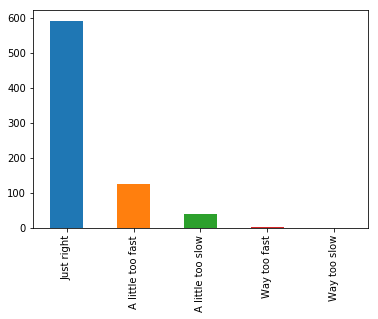

In [78]:
df_promoter["Schedule Pacing"].value_counts().plot(kind="bar")

### 'Schedule Pacing' for Passive

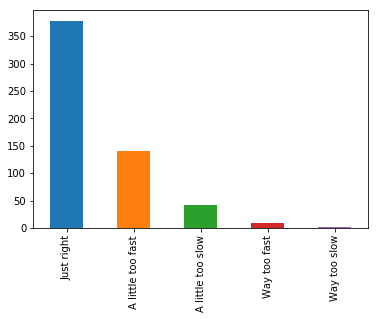

In [79]:
df_passive["Schedule Pacing"].value_counts().plot(kind="bar")

### "Schedule Pacing" for Detractors

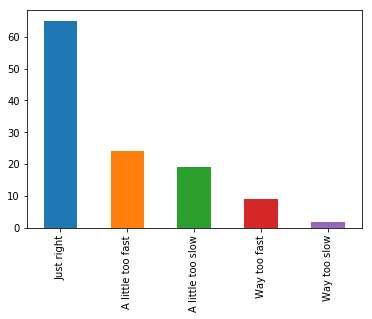

In [54]:
df_detractors["Schedule Pacing"].value_counts().plot(kind="bar")

### Correlation Plot for Correlating `Schedule Pacing` and `NPS_Type`

In [93]:
df[["Schedule Pacing", "NPS_Type"]].corr

<bound method DataFrame.corr of         Schedule Pacing   NPS_Type
0            Just right  Detractor
1     A little too fast  Detractor
2          Way too slow  Detractor
3     A little too fast  Detractor
4            Just right  Detractor
5            Just right  Detractor
6            Just right  Detractor
7     A little too slow  Detractor
8     A little too slow  Detractor
9            Just right  Detractor
10           Just right  Detractor
11           Just right  Detractor
12         Way too fast  Detractor
13           Just right  Detractor
14    A little too slow  Detractor
15    A little too slow  Detractor
16           Just right  Detractor
17    A little too slow  Detractor
18           Just right  Detractor
19           Just right  Detractor
20           Just right  Detractor
21           Just right  Detractor
22    A little too slow  Detractor
23    A little too slow  Detractor
24    A little too fast  Detractor
25    A little too fast  Detractor
26           Just right

In [94]:
DATA_DICT_NPS_TYPE = {
    "Detractor": -1,
    "Passive": 0,
    "Promoter": 1
}

DATA_DICT_PACING = {
    "Way too slow": 1,
    "A little too slow": 2,
    "Just right": 3,
    "A little too fast": 4,
    "Way too fast": 5
}

In [101]:
df["NPS_Type_Encoded"] = df["NPS_Type"].map(DATA_DICT_NPS_TYPE)
df["Schedule_Pacing_Encoded"] = df["Schedule Pacing"].map(DATA_DICT_PACING)

In [109]:
df[["Schedule_Pacing_Encoded", "NPS_Type_Encoded"]].corr()

,Schedule_Pacing_Encoded,NPS_Type_Encoded
Schedule_Pacing_Encoded,1.000000,-0.053972
NPS_Type_Encoded,-0.053972,1.000000


In [142]:
def plot_pacing_category_across_all_nps_types(pacing="Just right"):
    """ Function to plot all three pacing types proportionally. """
    pacing_nps_arr = [
        len(df_promoter[df_promoter["Schedule Pacing"] == pacing]) / len(df_promoter),           # Promoters
        len(df_passive[df_passive["Schedule Pacing"] == pacing]) / len(df_passive),              # Passives
        len(df_detractors[df_detractors["Schedule Pacing"] == pacing]) / len(df_detractors),     # Detractors
    ]
    return pacing_nps_arr

In [164]:
pacing = "Just right"

x_data = np.arange(10)
y_data = plot_pacing_category_across_all_nps_types(pacing)
labels = ["Promoters", "Passives", "Detractors"]

In [176]:
pacings = list(DATA_DICT_PACING.keys())

def plot_each_nps_type():
    X_data = np.arange(3)
    plt.figure(figsize=(15,15))
    for pacing in pacings:
        plt.plot(X_data, plot_pacing_category_across_all_nps_types(pacing))
    plt.xticks(X_data, labels)
    plt.legend(pacings)
    plt.title("Relationship Plot for All NPS Types Across All Pacings")
    plt.show()

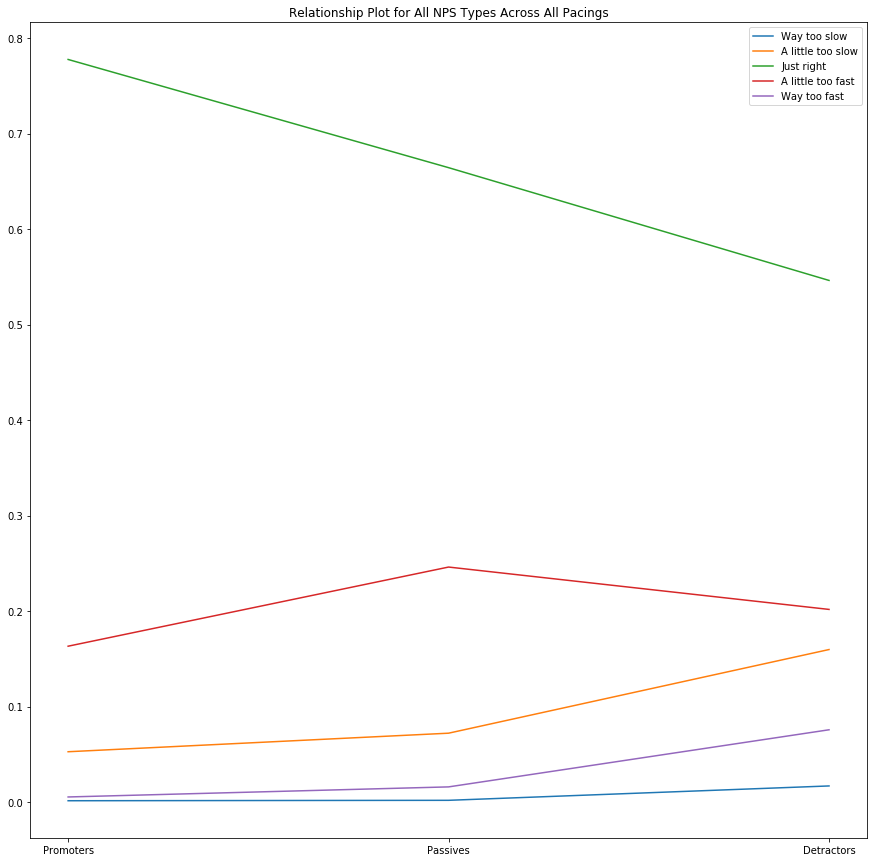

In [177]:
plot_each_nps_type()